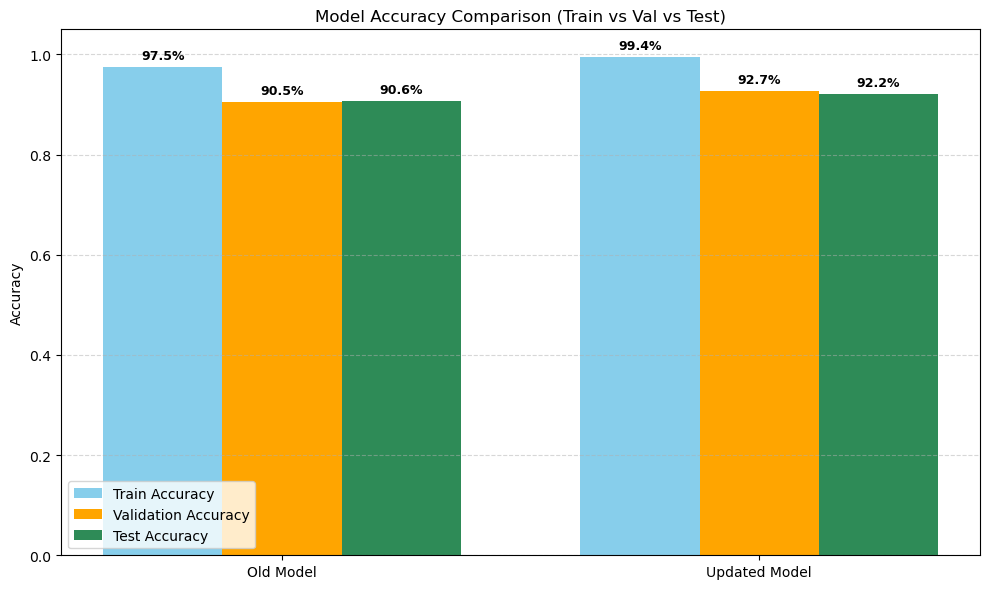

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load histories
old_history = np.load('old_model_history.npy', allow_pickle=True).item()
new_history = np.load('updated_model_history.npy', allow_pickle=True).item()

# Load test accuracies
test_acc_old = np.load('old_model_test_acc.npy', allow_pickle=True).item()
test_acc_new = np.load('updated_model_test_acc.npy', allow_pickle=True).item()

# Extract final epoch training/validation accuracy
old_train_acc = old_history['accuracy'][-1]
old_val_acc = old_history['val_accuracy'][-1]
new_train_acc = new_history['accuracy'][-1]
new_val_acc = new_history['val_accuracy'][-1]

# Prepare data
models = ['Old Model', 'Updated Model']
train_acc = [old_train_acc, new_train_acc]
val_acc = [old_val_acc, new_val_acc]
test_acc = [test_acc_old, test_acc_new]

x = np.arange(len(models))
bar_width = 0.25

# Plot
plt.figure(figsize=(10, 6))

train_bars = plt.bar(x - bar_width, train_acc, width=bar_width, label='Train Accuracy', color='skyblue')
val_bars = plt.bar(x, val_acc, width=bar_width, label='Validation Accuracy', color='orange')
test_bars = plt.bar(x + bar_width, test_acc, width=bar_width, label='Test Accuracy', color='seagreen')

# Add percentage labels on each bar
for bars in [train_bars, val_bars, test_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f"{height*100:.1f}%",
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

# Labeling
plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Train vs Val vs Test)")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()
